# Linear-Models - What if Data is imabalanced?

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, Normalizer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [2]:
def draw_line(coef,intercept, mi, ma):
    
    ''' mi, ma ==> ax+by+c=0 ==> x = (-by-c)/a '''
    
    points=np.array([[((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])

# What if Data is imabalanced

<pre>
1. As a part of this task you will observe how linear models work in case of data imbalanced
2. observe how hyper plane is changs according to change in your learning rate.
3. below we have created 4 random datasets which are linearly separable and having class imbalance
4. in the first dataset the ratio between positive and negative is 100 : 2, in the 2nd data its 100:20, 
in the 3rd data its 100:40 and in 4th one its 100:80
</pre>

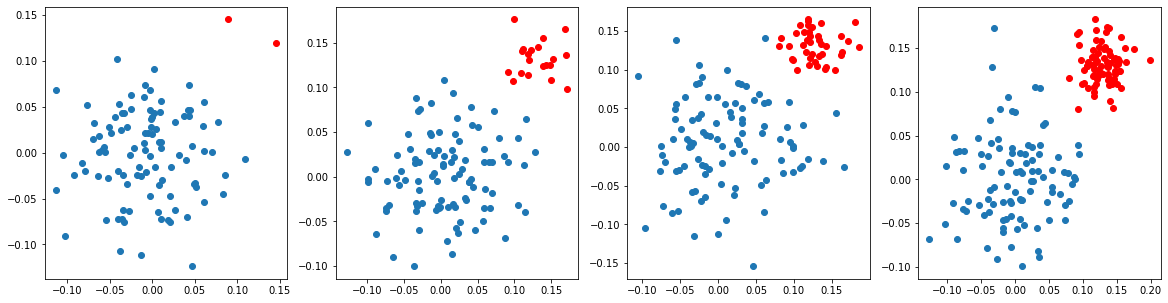

In [3]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
plt.figure(figsize=(20,5))
for j,i in enumerate(ratios):
    plt.subplot(1, 4, j+1)
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    plt.scatter(X_p[:,0],X_p[:,1])
    plt.scatter(X_n[:,0],X_n[:,1],color='red')
plt.show()

> your task is to apply SVM (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'>sklearn.svm.SVC</a>) and LR (<a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>sklearn.linear_model.LogisticRegression</a>) with different regularization strength [0.001, 1, 100]

## Task 1: Applying SVM

<pre>1. you need to create a grid of plots like this</pre>
<img src='https://i.imgur.com/TOmRwL3.png'> 
<pre>
in each of the cell[i][j] you will be drawing the hyper plane that you get after applying <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">SVM</a> on ith dataset and 
        jth learnig rate 

i.e 
<table>
    <tr><td>Plane(SVM().fit(D1, C=0.001))</td><td>Plane(SVM().fit(D1, C=1))</td><td>Plane(SVM().fit(D1, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D2, C=0.001))</td><td>Plane(SVM().fit(D2, C=1))</td><td>Plane(SVM().fit(D2, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D3, C=0.001))</td><td>Plane(SVM().fit(D3, C=1))</td><td>Plane(SVM().fit(D3, C=100))</td></tr>
    <tr><td>Plane(SVM().fit(D4, C=0.001))</td><td>Plane(SVM().fit(D4, C=1))</td><td>Plane(SVM().fit(D4, C=100))</td></tr>
</table>

if you can do, you can represent the support vectors in different colors, 
which will help us understand the position of hyper plane 


<font color='red'> <h3> Write in your own words, the observations from the above plots, and 
what do you think about the position of the hyper plane </h3> </font>

check the optimization problem here https://scikit-learn.org/stable/modules/svm.html#mathematical-formulation

if you can describe your understanding by writing it on a paper 
and attach the picture, or record a video upload it in assignment. 
</pre>

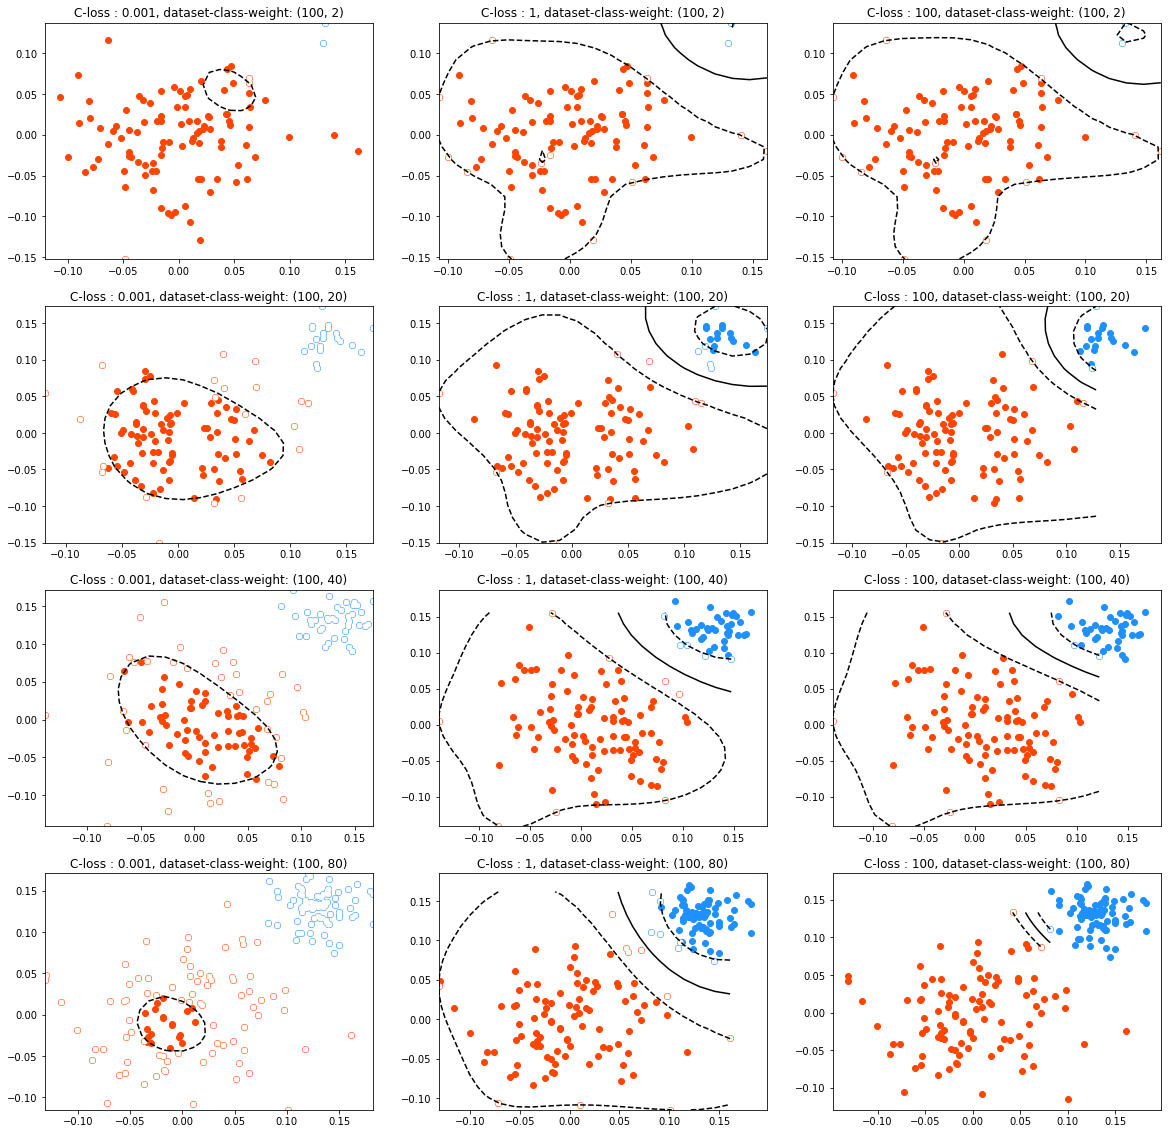

In [4]:
from sklearn.svm import SVC
hypers = [0.001, 1, 100]

plt.figure(figsize=(20, 20))

for j,i in enumerate(ratios):
    
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))

    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)

    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
    
    for c, k in enumerate(range(3*j+1, 3*(j+1)+1)):
        
        clf = SVC(C=hypers[c])
        clf.fit(X, y)
        
        f1 = clf.support_vectors_[:,0]
        f2 = clf.support_vectors_[:,1]
        
        f1_low, f1_max = f1.min(), f1.max()
        f2_low, f2_max = f2.min(), f2.max()
        
        xx = np.linspace(f1_low, f1_max, 20)
        yy = np.linspace(f2_low, f2_max, 20)
        
        X1, X2 = np.meshgrid(xx, yy)
        
        Z = np.empty(X1.shape)
        for (y_, z), val in np.ndenumerate(X1):
            x1 = val
            x2 = X2[y_, z]
            p = clf.decision_function([[x1, x2]])
            Z[y_, z] = p[0]
            
        levels = [-1, 0.0, 1]
        linestyles = ['dashed', 'solid', 'dashed']
        
        plt.subplot(4, 3, k)
        plt.scatter(X_p[:,0],X_p[:,1], color='orangered')
        plt.scatter(X_n[:,0], X_n[:,1], color='dodgerblue')
        plt.scatter(f1, f2,s=25, color="white")
        plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles, alpha=1)
        plt.title("C-loss : " + str(hypers[c])+", dataset-class-weight: "+str(i))
plt.show()

### `OBSERVATION:`

`1. When HingeLoss(C) is very low c = 0.001, classifier din't learn all data points properly; (classifier underfits). So, the position of the hyper plane separates negative data points as support vectors.`

`2. When HingeLoss(C) is very high c=10, classifier has learnt all data points very well; (classifier overfits). So, the position of the hyper plane exactly lies inbetween two classes.`

`3. when HingeLoss(C) is c=1, it learns properly. so, hyperplanes mostly tries to lie inbetween two classes.`

`4. when dataset is` **`too mach imbalanced (100, 2) and irespective of "C",classifier has learnt all negative point as positive`**.

`5. when dataset is imbalanced (100, 20) and c is very low c=0.1, classifier has learnt all negative point as positive.`

## Task 2: Applying LR

<pre> you will do the same thing what you have done in task 1.1, except instead of SVM you apply <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'>logistic regression </a>

<pre>these are results we got when we are experimenting with one of the model </pre>
<img src='https://i.imgur.com/vLXTxjY.png'>

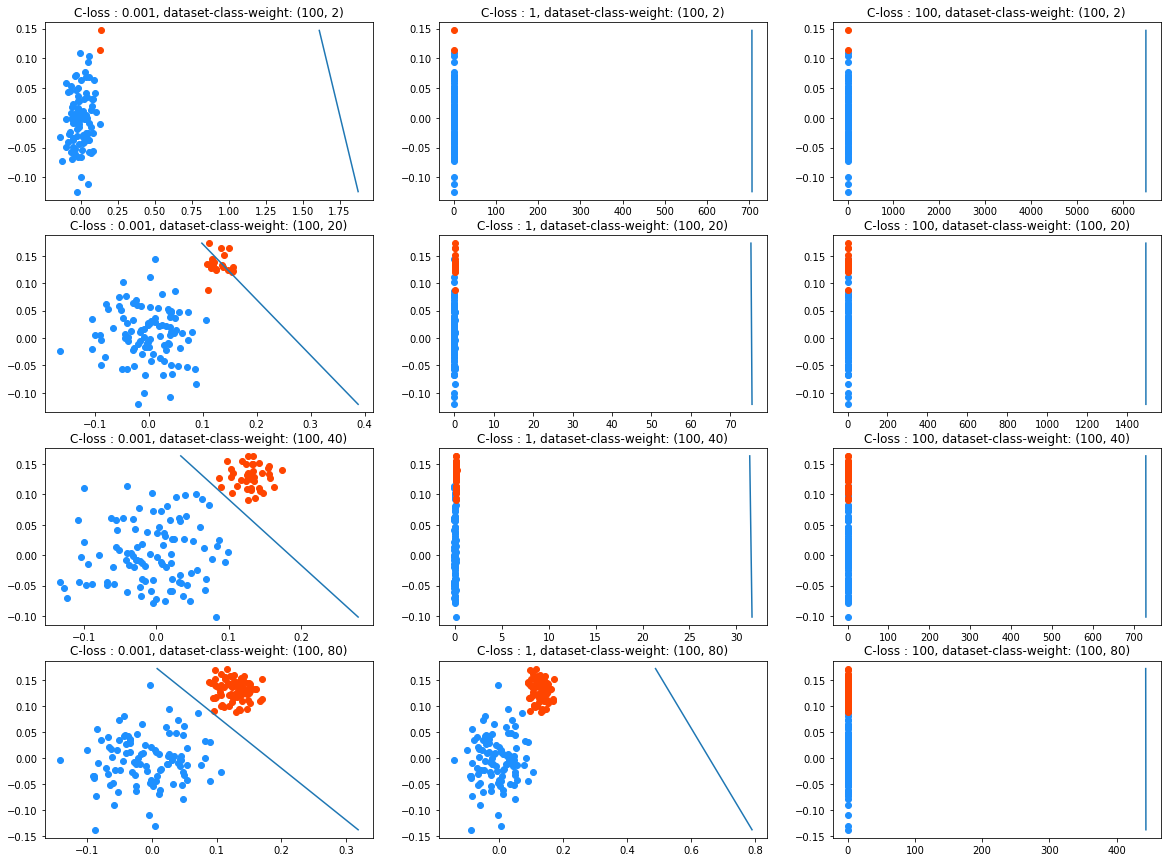

In [5]:
# here we are creating 2d imbalanced data points 
ratios = [(100,2), (100, 20), (100, 40), (100, 80)]
hypers = [0.001, 1, 100]

fig = plt.figure(figsize=(20, 15));
count=1

for j,i in enumerate(ratios):
    
    X_p=np.random.normal(0,0.05,size=(i[0],2))
    X_n=np.random.normal(0.13,0.02,size=(i[1],2))
    y_p=np.array([1]*i[0]).reshape(-1,1)
    y_n=np.array([0]*i[1]).reshape(-1,1)
    X=np.vstack((X_p,X_n))
    y=np.vstack((y_p,y_n))
        
    for c, k in enumerate(range(3*j+1, 3*(j+1)+1)):

        log = SGDClassifier(alpha=hypers[c], loss='log').fit(X, y)

        plt.subplot(4, 3, k)
        plt.scatter(X_p[:,0],X_p[:,1], color='dodgerblue')
        plt.scatter(X_n[:,0],X_n[:,1], color='orangered')
        draw_line(log.coef_[0], log.intercept_[0], min(X[:, 1]), max(X[:, 1]))
        plt.title("C-loss : " + str(hypers[c])+", dataset-class-weight: "+str(i))
fig.show();

### `OBSERVATION:`


`1. when regulizer` **`Regulaizer is very low alpha=0.001`** `and` **`if the dataset is >= 20%`** `((100,20), (100, 40), (100,80)), classifier learning datapoints very well.`

`2. when dataset is` **`too much imbalanced (100, 2)`** `and` **`regulizer is very low c=0.1`**, `classifier has learnt nothing. the hyper plane lies somewhere in space.`

`3. when` **`regulizer is more than c=1.0`**`, classifier has learnt nothing. the hyper plane lies somewhere in space.`